**1. Image Classification**
---

In [1]:
### Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.io import loadmat

### Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


#### Datasets, Metrics and Preprocessing

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.utils.multiclass import unique_labels

In [2]:
# import classiy function from the 'main_functions' notebook
from ipynb.fs.defs.main_functions import classify, plot_confusion

In [3]:
# Defining the classifier that can be used with easy calling names
classifiers = {'Naive Bayes': GaussianNB, 'KNN': KNeighborsClassifier, 'Logistic Regression': LogisticRegression,\
              'RF': RandomForestClassifier, 'SVM': SVC, 'SGD': SGDClassifier, 'AdaBoost': AdaBoostClassifier}

In [4]:
# Reading the dataset and creating the dataframe
image = loadmat('Datasets.mat/Image_segmentation_7classes_2100x19.mat')

df = pd.DataFrame(image.get('X'))
df['y'] = image.get('y').ravel()

In [5]:
df, df_test = train_test_split(df, test_size=0.2, stratify=df['y'])

# Exploratory Data Analysis (EDA)
This step is to get to know the data and decide what type of preprocessing needs to be done before training the model

In [6]:
df.head()

0      1    2         3    4         5         6          7  \
61    21.0  122.0  9.0  0.000000  0.0  0.444444  0.403687   0.444444   
559   29.0   78.0  9.0  0.000000  0.0  0.666665  0.699206   2.611111   
294  185.0  186.0  9.0  0.000000  0.0  2.166667  1.858913   2.999999   
662   14.0   90.0  9.0  0.111111  0.0  2.944445  2.435083   3.333333   
612   18.0   66.0  9.0  0.000000  0.0  8.666665  9.089677  10.944443   

            8          9         10         11         12         13  \
61   0.403687   0.555556   0.000000   1.222222   0.444444  -1.666667   
559  2.322991  69.740740  59.666668  88.444440  61.111110 -30.222221   
294  1.349897  48.222220  44.000000  58.888890  41.777780 -12.666667   
662  3.211092   5.000000   2.555556   7.333334   5.111111  -7.333334   
612  5.289054  39.888890  32.333336  49.555557  37.777780 -22.666666   

           14         15         16        17        18  y  
61    2.00000  -0.333333   1.222222  0.555556 -2.444563  3  
559  56.11111 -25.888890  88.444440  0.325487 -2.145541  4  
294  32.00000 -19.333334  58.888890  0.290427 -1.956023  6  
662   7.00000   0.333333   7.333334  0.725289 -2.639389  3  
612  29.00000  -6.333334  49.555557  0.350169 -2.430630  3

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 61 to 1710
Data columns (total 20 columns):
0     1848 non-null float64
1     1848 non-null float64
2     1848 non-null float64
3     1848 non-null float64
4     1848 non-null float64
5     1848 non-null float64
6     1848 non-null float64
7     1848 non-null float64
8     1848 non-null float64
9     1848 non-null float64
10    1848 non-null float64
11    1848 non-null float64
12    1848 non-null float64
13    1848 non-null float64
14    1848 non-null float64
15    1848 non-null float64
16    1848 non-null float64
17    1848 non-null float64
18    1848 non-null float64
y     1848 non-null uint8
dtypes: float64(19), uint8(1)
memory usage: 290.6 KB


In [8]:
df.describe()

0            1       2            3            4  \
count  1848.000000  1848.000000  1848.0  1848.000000  1848.000000   
mean    125.066017   123.259740     9.0     0.014731     0.004930   
std      73.002236    57.480193     0.0     0.040593     0.024847   
min       1.000000    11.000000     9.0     0.000000     0.000000   
25%      62.750000    81.000000     9.0     0.000000     0.000000   
50%     121.500000   122.000000     9.0     0.000000     0.000000   
75%     188.000000   171.250000     9.0     0.000000     0.000000   
max     254.000000   250.000000     9.0     0.333333     0.222222   

                 5            6            7             8            9  \
count  1848.000000  1848.000000  1848.000000  1.848000e+03  1848.000000   
mean      1.881884     5.933974     2.424032  8.593880e+00    37.114719   
std       2.635572    47.183577     3.596687  6.334530e+01    38.059250   
min       0.000000     0.000000     0.000000 -1.589457e-08     0.000000   
25%       0.722221     0.365148     0.833333  4.296293e-01     7.583333   
50%       1.250001     0.833333     1.444444  1.003696e+00    21.796298   
75%       2.166667     1.807406     2.555556  2.236616e+00    53.074074   
max      29.222221   991.718400    44.722225  1.386329e+03   143.444440   

                10           11           12           13           14  \
count  1848.000000  1848.000000  1848.000000  1848.000000  1848.000000   
mean     32.866823    44.267377    34.209957   -12.743687    21.457973   
std      34.889254    43.446104    36.237914    11.601777    19.589085   
min       0.000000     0.000000     0.000000   -49.666668   -12.444445   
25%       7.111111     9.666667     6.222222   -18.777779     4.277778   
50%      19.666668    27.888890    20.666668   -10.888889    19.888890   
75%      47.333332    64.472220    46.249998    -4.222222    36.222220   
max     136.888890   150.888890   142.555560     9.888889    82.000000   

                15           16           17           18            y  
count  1848.000000  1848.000000  1848.000000  1848.000000  1848.000000  
mean     -8.714286    45.226492     0.424561    -1.357139     4.000000  
std      11.579380    42.832147     0.227738     1.550011     2.000541  
min     -33.888890     0.000000     0.000000    -3.044175     1.000000  
25%     -17.000000    11.722222     0.282895    -2.191452     2.000000  
50%     -11.000000    28.777779     0.369868    -2.052356     4.000000  
75%      -3.111111    64.472220     0.537202    -1.555306     6.000000  
max      24.666666   150.888890     1.000000     2.912480     7.000000

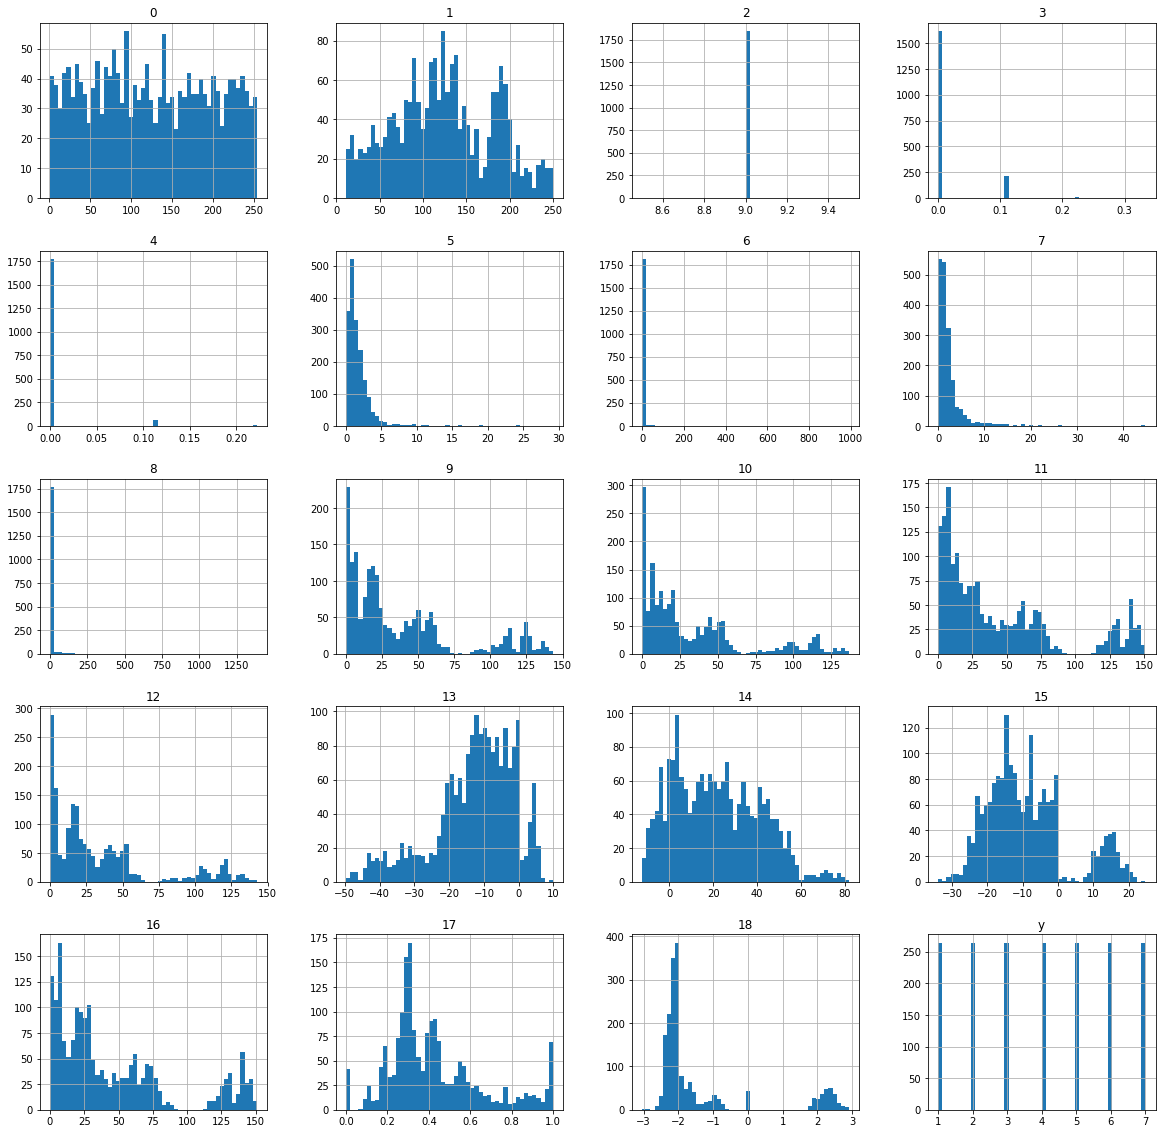

In [9]:
df.hist(bins= 50, figsize=(20,20))
plt.show()

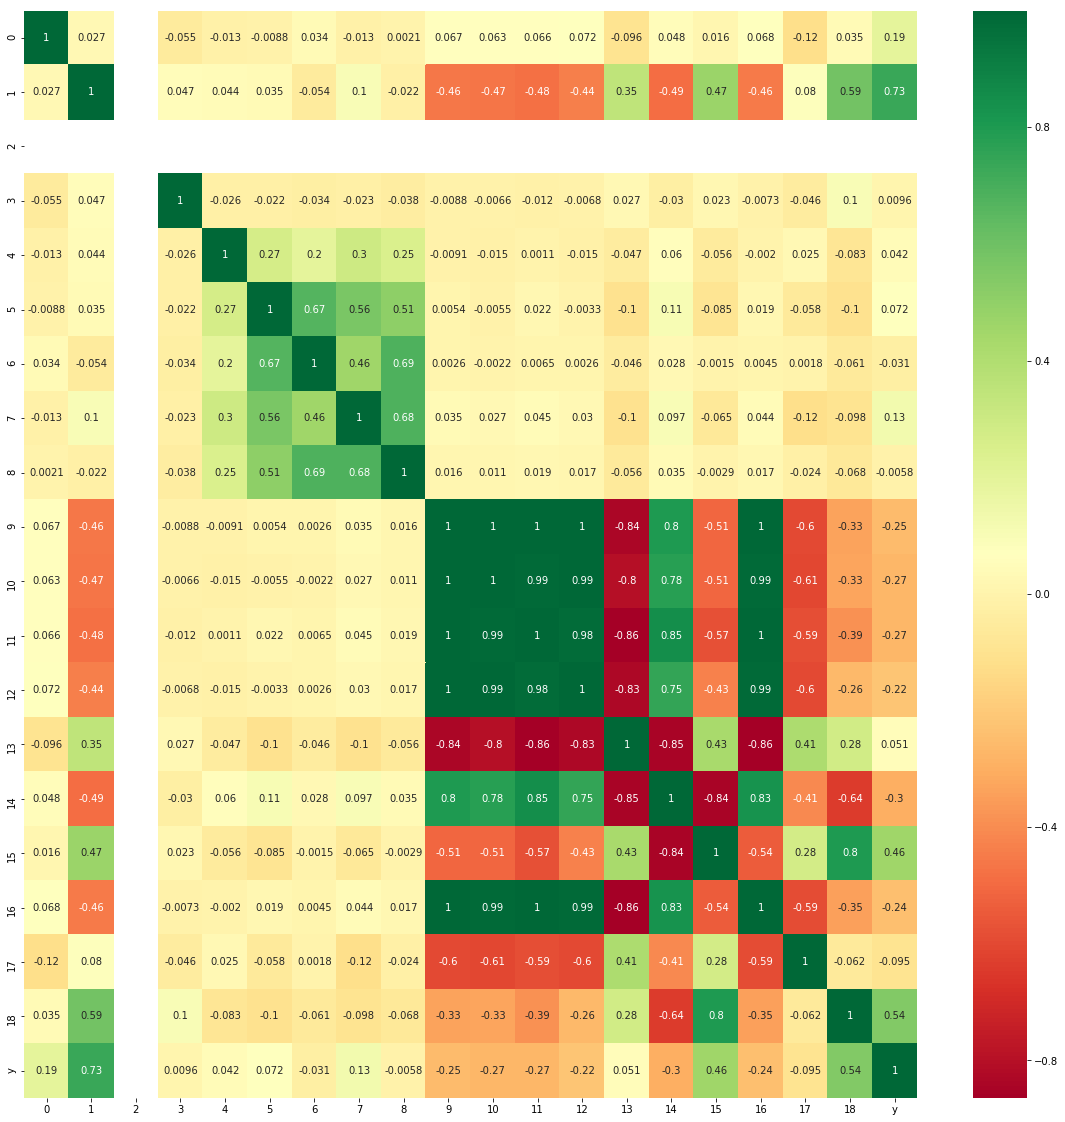

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
# top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [11]:
corrmat['y'].sort_values(ascending=True)

14   -0.301987
10   -0.270870
11   -0.267413
9    -0.253451
16   -0.240736
12   -0.217175
17   -0.095247
6    -0.031386
8    -0.005834
3     0.009630
4     0.042359
13    0.050604
5     0.072046
7     0.128048
0     0.194574
15    0.460176
18    0.541435
1     0.731958
y     1.000000
2          NaN
Name: y, dtype: float64

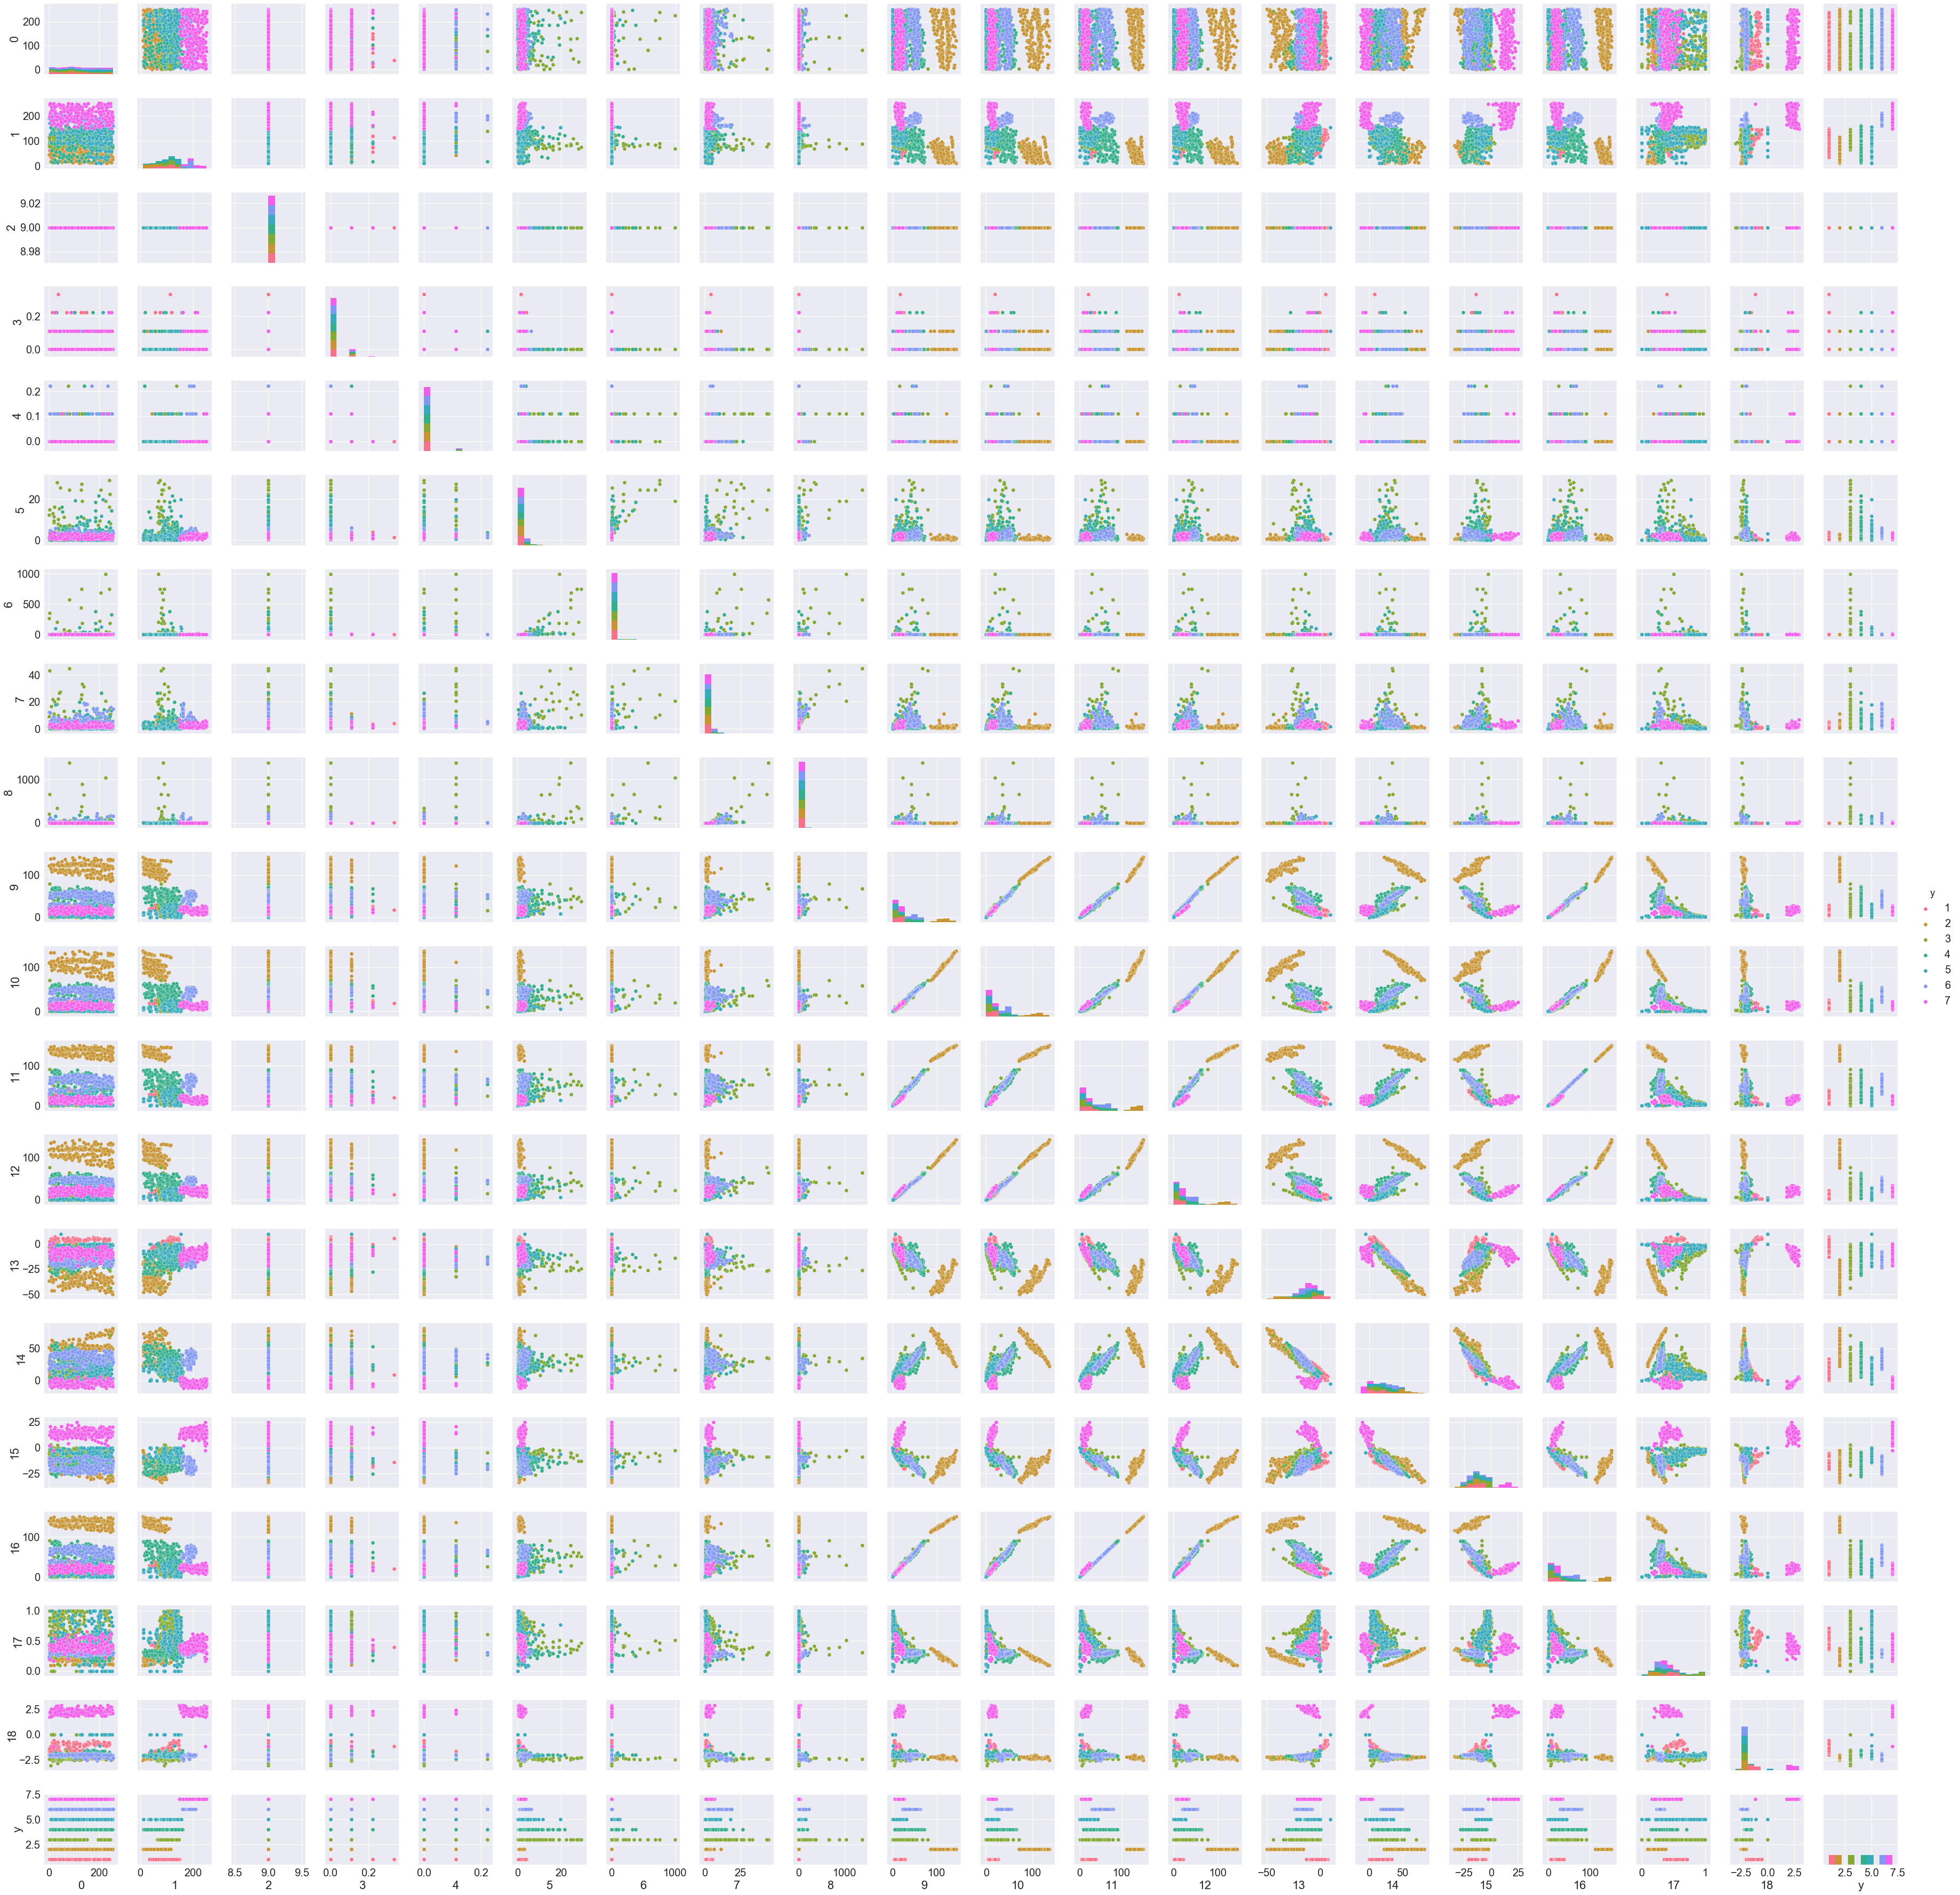

In [14]:
import seaborn as sns
sns.set(font_scale=2)
sns.pairplot(df, hue='y')

In [15]:
df['y'].value_counts()
df['y'].value_counts()/df['y'].value_counts().sum()
# print(ratio)

7    0.142857
6    0.142857
5    0.142857
4    0.142857
3    0.142857
2    0.142857
1    0.142857
Name: y, dtype: float64

# Preprocessing

**In this dataset:** <br>
- No categorical attributes exists <br>
- I did not consider it as imbalanced since the ratio is almost 2:3
- Scaling will be applied

In [16]:
scaler = MinMaxScaler()
df_features = df.drop('y',axis=1)
cancer_prepared = scaler.fit_transform(df_features)

# 1. Naive Bayes

In [17]:
sns.set(font_scale=1)
sns.set_style('ticks')

The model score is 0.791 (+/- 0.017)
The IQR is 0.030 between [0.77,0.80]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.75      0.96      0.84      2640
         2.0       1.00      0.99      0.99      2640
         3.0       0.66      0.18      0.28      2640
         4.0       0.83      0.86      0.85      2640
         5.0       0.43      0.63      0.51      2640
         6.0       0.98      0.94      0.96      2640
         7.0       1.00      0.97      0.99      2640

    accuracy                           0.79     18480
   macro avg       0.81      0.79      0.77     18480
weighted avg       0.81      0.79      0.77     18480

The average training time is 0.002703 seconds


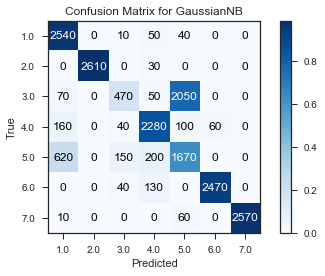

In [18]:
val_conf_NB, val_scores_NB, val_time_NB = classify(df.drop('y',axis=1), df['y'], classifiers['Naive Bayes']())
print('The average training time is %0.6f seconds'%val_time_NB.mean())

The test accuracy is 0.79
              precision    recall  f1-score   support

           1       0.95      0.71      0.81        89
           2       1.00      1.00      1.00        66
           3       0.14      0.82      0.23        11
           4       0.83      0.80      0.81        69
           5       0.73      0.47      0.57       103
           6       0.91      1.00      0.95        60
           7       0.97      1.00      0.98        64

    accuracy                           0.79       462
   macro avg       0.79      0.83      0.77       462
weighted avg       0.87      0.79      0.81       462



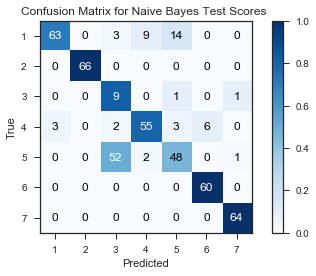

In [19]:
#  Fitting on the training data
NB = classifiers['Naive Bayes']()
NB.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = NB.predict(df_test.drop('y',axis=1))
test_score_NB = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_NB)
print(classification_report(test_pred, df_test['y']))
_,test_conf_NB = plot_confusion(test_pred, df_test['y'],'Naive Bayes Test Scores ()')

# 2. Logistic Regression

The model score is 0.925 (+/- 0.021)
The IQR is 0.035 between [0.91,0.94]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99      2640
         2.0       1.00      1.00      1.00      2640
         3.0       0.84      0.85      0.84      2640
         4.0       0.93      0.86      0.89      2640
         5.0       0.76      0.78      0.77      2640
         6.0       0.97      1.00      0.98      2640
         7.0       1.00      1.00      1.00      2640

    accuracy                           0.93     18480
   macro avg       0.93      0.93      0.93     18480
weighted avg       0.93      0.93      0.93     18480

The average training time is 0.129781 seconds


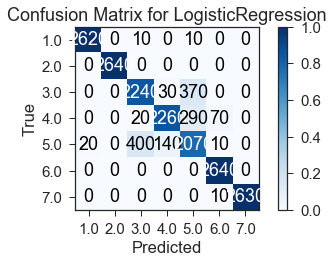

In [60]:
val_conf_LR, val_scores_LR, val_time_LR = classify(df.drop('y',axis=1), df['y'],
                                              classifiers['Logistic Regression'](solver='liblinear',
                                                                                 multi_class = 'ovr'))
print('The average training time is %0.6f seconds'%val_time_LR.mean())

The test accuracy is 0.92
              precision    recall  f1-score   support

           1       0.98      0.97      0.98        67
           2       1.00      1.00      1.00        66
           3       0.86      0.81      0.84        70
           4       0.82      0.93      0.87        58
           5       0.77      0.74      0.76        69
           6       1.00      0.97      0.99        68
           7       0.97      1.00      0.98        64

    accuracy                           0.92       462
   macro avg       0.92      0.92      0.92       462
weighted avg       0.92      0.92      0.92       462



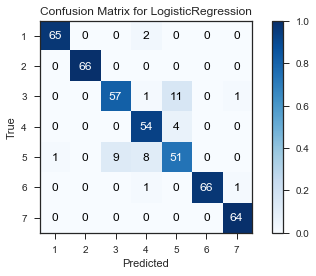

In [22]:
#  Fitting on the training data
LR = classifiers['Logistic Regression'](solver='lbfgs',  multi_class = 'multinomial')
LR.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = LR.predict(df_test.drop('y',axis=1))
test_score_LR = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_LR)
print(classification_report(test_pred, df_test['y']))
_,test_conf_LR = plot_confusion(test_pred, df_test['y'],LR)

# 3. Ensemble - Random Forests

n_estimators=500

The model score is 0.977 (+/- 0.013)
The IQR is 0.021 between [0.97,0.99]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99      2640
         2.0       1.00      1.00      1.00      2640
         3.0       0.95      0.96      0.96      2640
         4.0       0.97      0.96      0.97      2640
         5.0       0.93      0.95      0.94      2640
         6.0       1.00      1.00      1.00      2640
         7.0       1.00      1.00      1.00      2640

    accuracy                           0.98     18480
   macro avg       0.98      0.98      0.98     18480
weighted avg       0.98      0.98      0.98     18480

The average training time is 1.403543 seconds


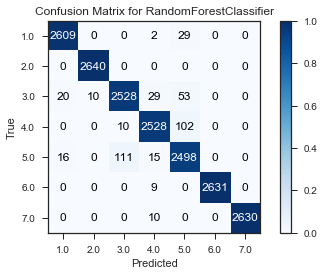

In [23]:
val_conf_RF, val_scores_RF, val_time_RF = classify(df.drop('y',axis=1), df['y'],classifiers['RF'](n_estimators = 500))
print('The average training time is %0.6f seconds'%val_time_RF.mean())

The test accuracy is 0.97
              precision    recall  f1-score   support

           1       1.00      0.99      0.99        67
           2       1.00      1.00      1.00        66
           3       0.97      0.90      0.93        71
           4       0.97      0.98      0.98        65
           5       0.91      0.95      0.93        63
           6       1.00      1.00      1.00        66
           7       0.97      1.00      0.98        64

    accuracy                           0.97       462
   macro avg       0.97      0.97      0.97       462
weighted avg       0.97      0.97      0.97       462



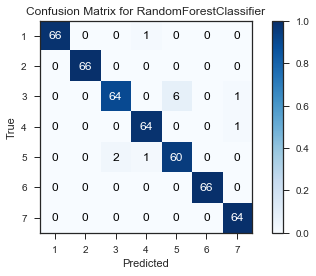

In [24]:
#  Fitting on the training data
RF = classifiers['RF'](n_estimators = 500)
RF.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = RF.predict(df_test.drop('y',axis=1))
test_score_RF = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_RF)
print(classification_report(test_pred, df_test['y']))
_,test_conf_RF = plot_confusion(test_pred, df_test['y'],RF)

# 4. Ensemble - AdaBoost

The model score is 0.427 (+/- 0.002)
The IQR is 0.000 between [0.43,0.43]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.20      0.83      0.32      2640
         2.0       1.00      1.00      1.00      2640
         3.0       0.20      0.07      0.10      2640
         4.0       0.00      0.00      0.00      2640
         5.0       0.20      0.03      0.05      2640
         6.0       0.20      0.07      0.11      2640
         7.0       1.00      1.00      1.00      2640

    accuracy                           0.43     18480
   macro avg       0.40      0.43      0.37     18480
weighted avg       0.40      0.43      0.37     18480

The average training time is 0.730177 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


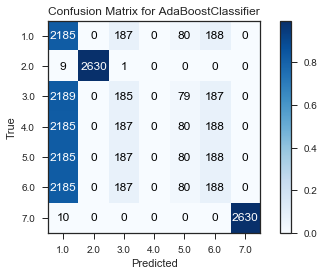

In [25]:
val_conf_Ada, val_scores_Ada, val_time_Ada = classify(df.drop('y',axis=1), np.array(df['y']),
                                                      classifiers['AdaBoost'](n_estimators=200))
print('The average training time is %0.6f seconds'%val_time_Ada.mean())

The test accuracy is 0.43
              precision    recall  f1-score   support

           1       1.00      0.20      0.33       331
           2       1.00      1.00      1.00        66
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.98      1.00      0.99        65

    accuracy                           0.43       462
   macro avg       0.43      0.31      0.33       462
weighted avg       1.00      0.43      0.52       462



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
ipynb.fs.defs.main_functions:40: RuntimeWarning: invalid value encountered in true_divide


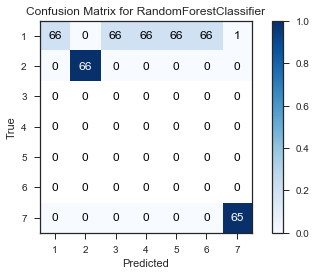

In [28]:
#  Fitting on the training data
Ada = classifiers['AdaBoost'](n_estimators = 200)
Ada.fit(df.drop('y',axis=1), np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = Ada.predict(df_test.drop('y',axis=1))
test_score_Ada = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.2f'%test_score_Ada)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_Ada = plot_confusion(test_pred, df_test['y'],RF)

# 5. K-Nearest Neighbours

In [31]:
np.shape(df['y'])

(1848,)

The model score is 0.965 (+/- 0.010)
The IQR is 0.011 between [0.96,0.97]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98      2640
         2.0       1.00      1.00      1.00      2640
         3.0       0.93      0.95      0.94      2640
         4.0       0.96      0.94      0.95      2640
         5.0       0.90      0.89      0.89      2640
         6.0       0.99      1.00      0.99      2640
         7.0       1.00      1.00      1.00      2640

    accuracy                           0.96     18480
   macro avg       0.96      0.96      0.96     18480
weighted avg       0.96      0.96      0.96     18480

The model score is 0.956 (+/- 0.014)
The IQR is 0.025 between [0.95,0.97]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.96      0.99      0.98      2640
         2.0       1.00      1.00      1.00      2640
         3.0       0.87      0.98      0.92 

The model score is 0.938 (+/- 0.023)
The IQR is 0.030 between [0.93,0.96]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96      2640
         2.0       1.00      1.00      1.00      2640
         3.0       0.86      0.90      0.88      2640
         4.0       0.96      0.86      0.90      2640
         5.0       0.85      0.83      0.84      2640
         6.0       0.95      1.00      0.97      2640
         7.0       1.00      1.00      1.00      2640

    accuracy                           0.94     18480
   macro avg       0.94      0.94      0.94     18480
weighted avg       0.94      0.94      0.94     18480

The model score is 0.938 (+/- 0.022)
The IQR is 0.033 between [0.92,0.96]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96      2640
         2.0       1.00      1.00      1.00      2640
         3.0       0.86      0.91      0.88 

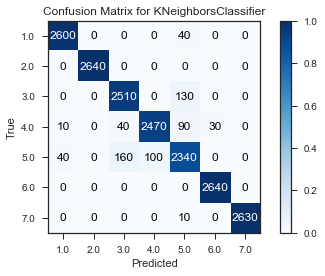

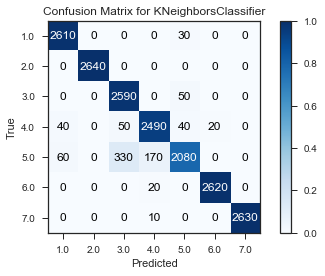

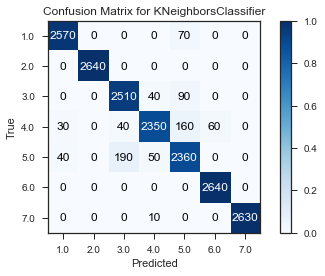

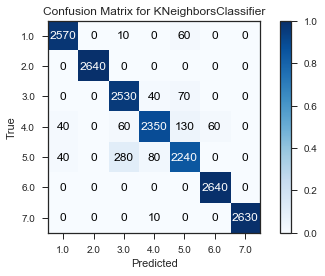

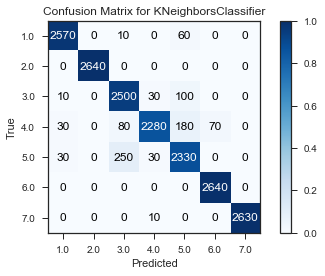

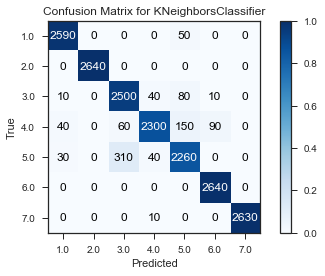

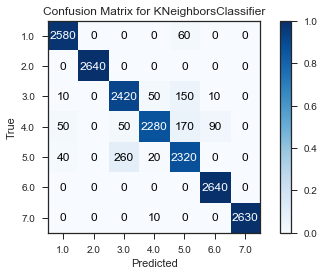

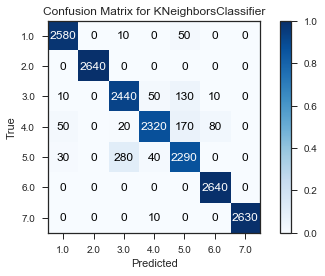

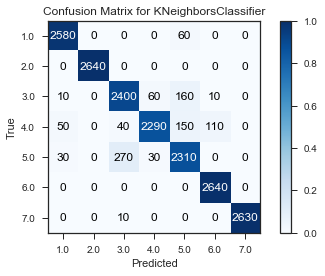

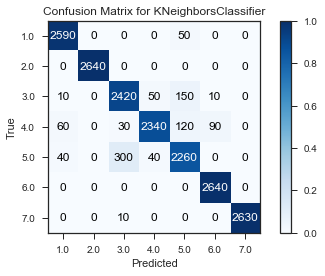

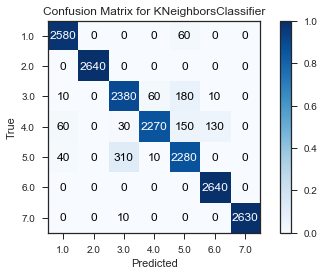

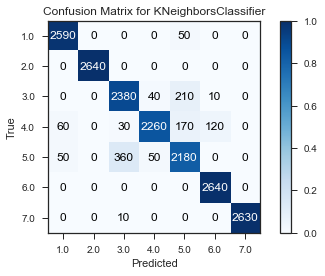

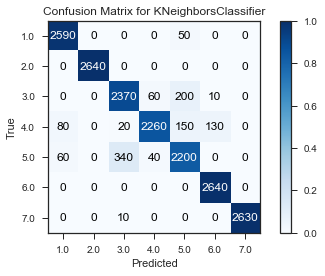

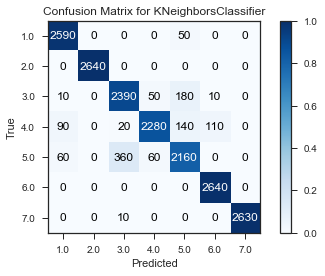

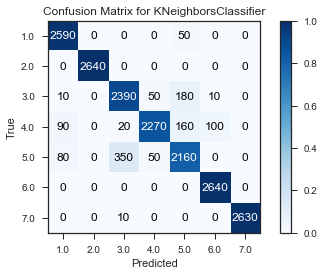

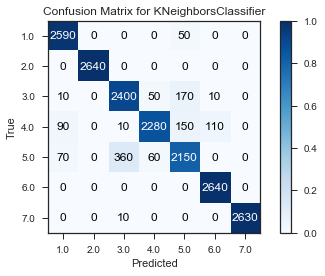

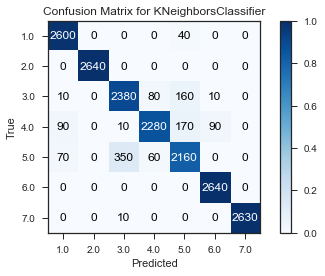

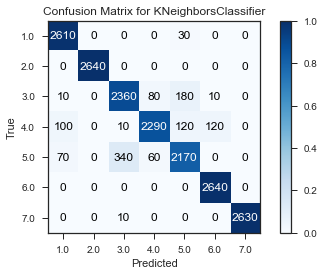

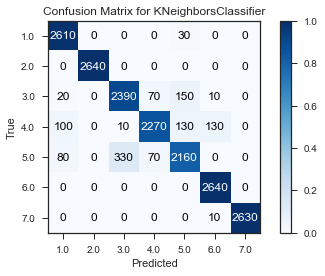

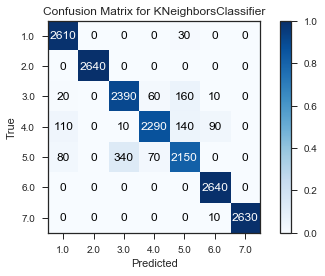

In [32]:
KNN_scores = []
for k in range(1,21):
    _, val_scores_KNN, _= classify(cancer_prepared, np.array(df['y']),classifiers['KNN'](k))
    KNN_scores.append(np.round(val_scores_KNN.mean(),4))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

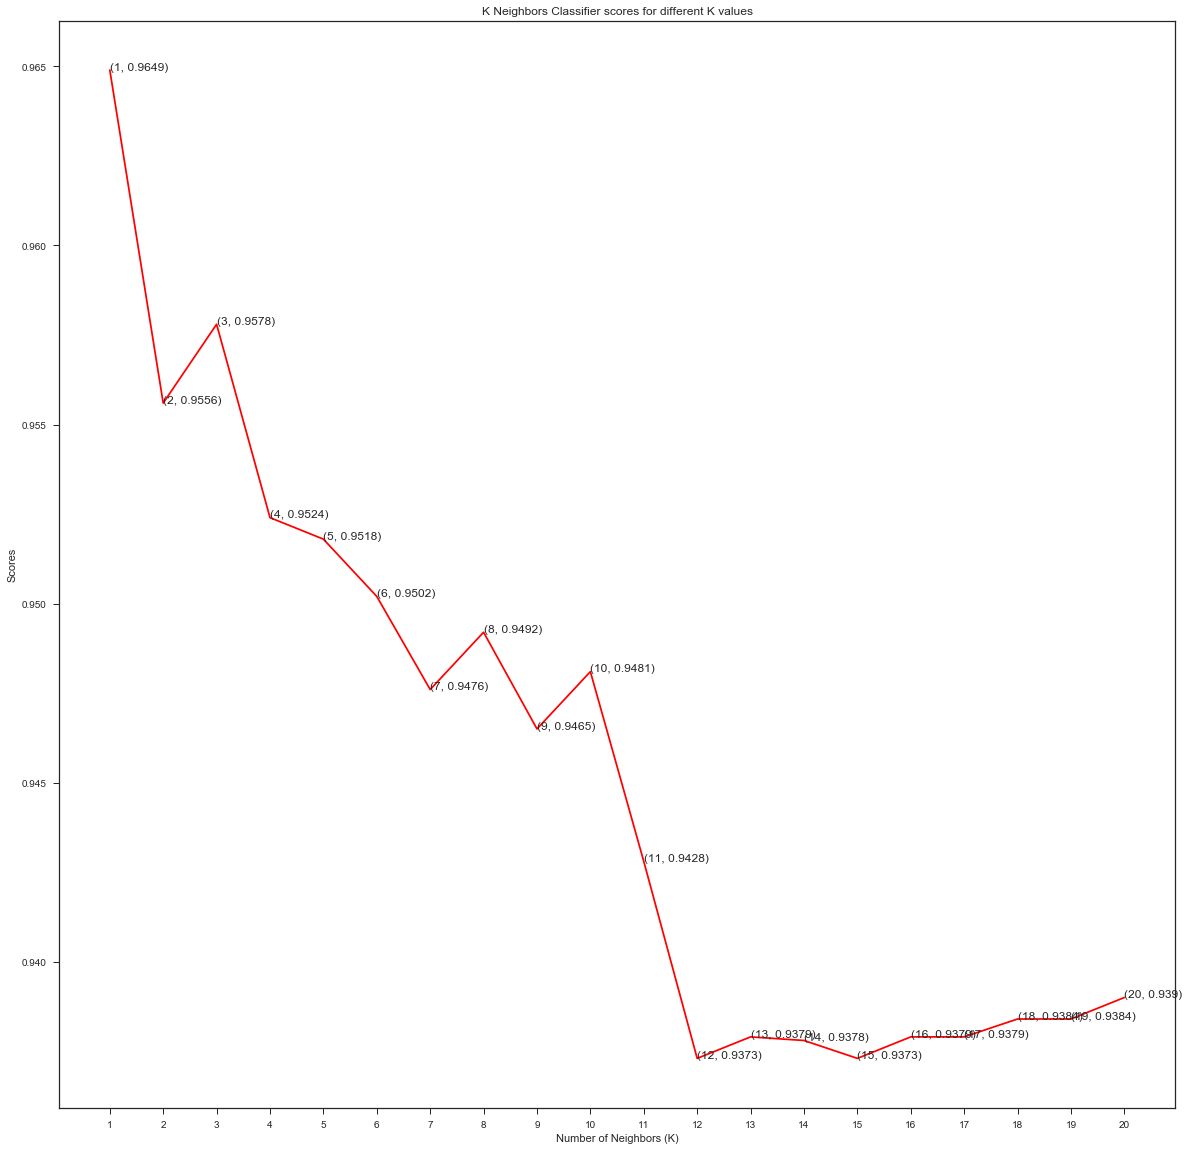

In [33]:
plt.figure(figsize=(20,20))
plt.plot([k for k in range(1, 21)], KNN_scores, color = 'red')
for i in range(1,21):
    plt.text(i, KNN_scores[i-1], (i, KNN_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

The model score is 0.965 (+/- 0.010)
The IQR is 0.011 between [0.96,0.97]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98      2640
         2.0       1.00      1.00      1.00      2640
         3.0       0.93      0.95      0.94      2640
         4.0       0.96      0.94      0.95      2640
         5.0       0.90      0.89      0.89      2640
         6.0       0.99      1.00      0.99      2640
         7.0       1.00      1.00      1.00      2640

    accuracy                           0.96     18480
   macro avg       0.96      0.96      0.96     18480
weighted avg       0.96      0.96      0.96     18480

The average training time is 0.003411 seconds


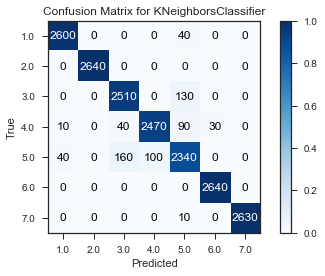

In [34]:
val_conf_KNN, val_scores_KNN, val_time_KNN = classify(cancer_prepared, np.array(df['y']),
                                                      classifiers['KNN'](KNN_scores.index(max(KNN_scores))+1))
print('The average training time is %0.6f seconds'%val_time_KNN.mean())

In [35]:
scaled_test = scaler.transform(df_test.drop('y',axis=1))

The test accuracy is 0.9351
              precision    recall  f1-score   support

           1       0.97      0.93      0.95        69
           2       1.00      1.00      1.00        66
           3       0.94      0.85      0.89        73
           4       0.85      0.98      0.91        57
           5       0.82      0.83      0.82        65
           6       1.00      0.97      0.99        68
           7       0.97      1.00      0.98        64

    accuracy                           0.94       462
   macro avg       0.94      0.94      0.93       462
weighted avg       0.94      0.94      0.94       462



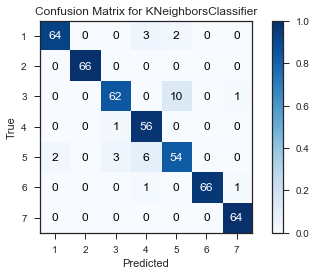

In [36]:
#  Fitting on the training data
KNN = classifiers['KNN'](9)
KNN.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = KNN.predict(scaled_test)
test_score_KNN = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_KNN)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_KNN = plot_confusion(test_pred, df_test['y'],KNN)

# 6. Support Vector Machines - Linear Kernel

In [38]:
from time import time

In [39]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21),'gamma':2.**np.linspace(-15,3,19)}
]

clf = SVC(kernel='linear')
start = time()
grid_search_L = GridSearchCV(clf, param_grid, cv=10)
grid_search_L.fit(cancer_prepared, np.array(df['y']))
print('Time take to search for the best combination si %0.6f seconds'% (time()-start))

Time take to search for the best combination si 449.561353 seconds


The model score is 0.963 (+/- 0.012)
The IQR is 0.016 between [0.96,0.97]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99      2640
         2.0       1.00      1.00      1.00      2640
         3.0       0.92      0.92      0.92      2640
         4.0       0.96      0.93      0.95      2640
         5.0       0.88      0.89      0.89      2640
         6.0       0.99      1.00      0.99      2640
         7.0       1.00      1.00      1.00      2640

    accuracy                           0.96     18480
   macro avg       0.96      0.96      0.96     18480
weighted avg       0.96      0.96      0.96     18480

The average training time is 0.380343 seconds


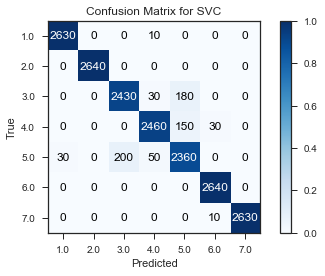

In [40]:
val_conf_SVM_L_opt, val_scores_SVM_L_opt, val_time_SVM_L = classify(cancer_prepared, np.array(df['y']),
                                                 classifiers['SVM'](kernel='linear', C=grid_search_L.best_params_['C'],
                                                                        gamma = grid_search_L.best_params_['gamma']))

print('The average training time is %0.6f seconds'%val_time_SVM_L.mean())

In [41]:
cvres = grid_search_L.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8246753246753247 {'C': 0.03125, 'gamma': 3.0517578125e-05}
0.8246753246753247 {'C': 0.03125, 'gamma': 6.103515625e-05}
0.8246753246753247 {'C': 0.03125, 'gamma': 0.0001220703125}
0.8246753246753247 {'C': 0.03125, 'gamma': 0.000244140625}
0.8246753246753247 {'C': 0.03125, 'gamma': 0.00048828125}
0.8246753246753247 {'C': 0.03125, 'gamma': 0.0009765625}
0.8246753246753247 {'C': 0.03125, 'gamma': 0.001953125}
0.8246753246753247 {'C': 0.03125, 'gamma': 0.00390625}
0.8246753246753247 {'C': 0.03125, 'gamma': 0.0078125}
0.8246753246753247 {'C': 0.03125, 'gamma': 0.015625}
0.8246753246753247 {'C': 0.03125, 'gamma': 0.03125}
0.8246753246753247 {'C': 0.03125, 'gamma': 0.0625}
0.8246753246753247 {'C': 0.03125, 'gamma': 0.125}
0.8246753246753247 {'C': 0.03125, 'gamma': 0.25}
0.8246753246753247 {'C': 0.03125, 'gamma': 0.5}
0.8246753246753247 {'C': 0.03125, 'gamma': 1.0}
0.8246753246753247 {'C': 0.03125, 'gamma': 2.0}
0.8246753246753247 {'C': 0.03125, 'gamma': 4.0}
0.8246753246753247 {'C': 0.03125,

The test accuracy is 0.9372
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        70
           2       1.00      1.00      1.00        66
           3       0.88      0.87      0.87        67
           4       0.86      0.95      0.90        60
           5       0.85      0.82      0.84        68
           6       1.00      0.99      0.99        67
           7       0.97      1.00      0.98        64

    accuracy                           0.94       462
   macro avg       0.94      0.94      0.94       462
weighted avg       0.94      0.94      0.94       462



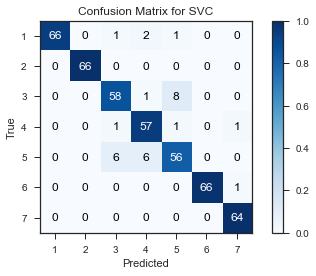

In [42]:
#  Fitting on the training data
SVM_L = classifiers['SVM'](kernel='linear', 
                           C=grid_search_L.best_params_['C'], 
                          gamma = grid_search_L.best_params_['gamma'])
SVM_L.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = SVM_L.predict(scaled_test)
test_score_SVM_L = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_SVM_L)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_SVM_L = plot_confusion(test_pred, df_test['y'],SVM_L)

# 7. Support Vector Machines - RBF Kernel

In [43]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21),'gamma':2.**np.linspace(-15,3,19)}
]

clf = SVC(kernel='rbf')

start = time()
grid_search_RBF = GridSearchCV(clf, param_grid, cv=10)
grid_search_RBF.fit(cancer_prepared, np.array(df['y']))
print('Time take to search for the best combination si %0.6f seconds'% (time()-start))

Time take to search for the best combination si 350.570658 seconds


The model score is 0.976 (+/- 0.011)
The IQR is 0.012 between [0.97,0.98]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00      2640
         2.0       1.00      1.00      1.00      2640
         3.0       0.94      0.96      0.95      2640
         4.0       0.96      0.96      0.96      2640
         5.0       0.94      0.91      0.93      2640
         6.0       1.00      1.00      1.00      2640
         7.0       1.00      1.00      1.00      2640

    accuracy                           0.98     18480
   macro avg       0.98      0.98      0.98     18480
weighted avg       0.98      0.98      0.98     18480

The average training time is 0.035264 seconds


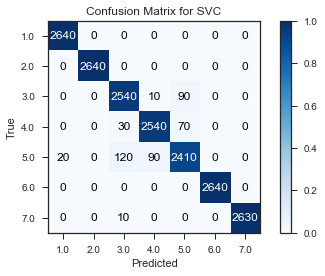

In [44]:
val_conf_SVM_RBF, val_scores_SVM_RBF, val_time_SVM_RBF = classify(cancer_prepared, np.array(df['y']),
                                                             classifiers['SVM'](kernel='rbf', 
                                                                                C=grid_search_RBF.best_params_['C'],
                                                                        gamma = grid_search_RBF.best_params_['gamma']))

print('The average training time is %0.6f seconds'%val_time_SVM_RBF.mean())

The test accuracy is 0.9632
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        68
           2       1.00      1.00      1.00        66
           3       1.00      0.93      0.96        71
           4       0.94      0.91      0.93        68
           5       0.83      0.95      0.89        58
           6       1.00      0.99      0.99        67
           7       0.97      1.00      0.98        64

    accuracy                           0.96       462
   macro avg       0.96      0.96      0.96       462
weighted avg       0.97      0.96      0.96       462



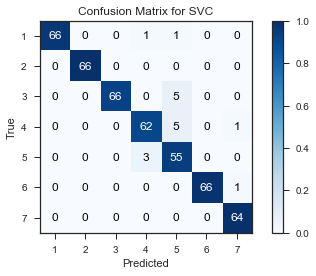

In [45]:
#  Fitting on the training data
SVM_RBF = classifiers['SVM'](kernel='rbf', 
                           C=grid_search_RBF.best_params_['C'], 
                          gamma = grid_search_RBF.best_params_['gamma'])
SVM_RBF.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = SVM_RBF.predict(scaled_test)
test_score_SVM_RBF = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_SVM_RBF)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_SVM_L = plot_confusion(test_pred, df_test['y'],SVM_RBF)

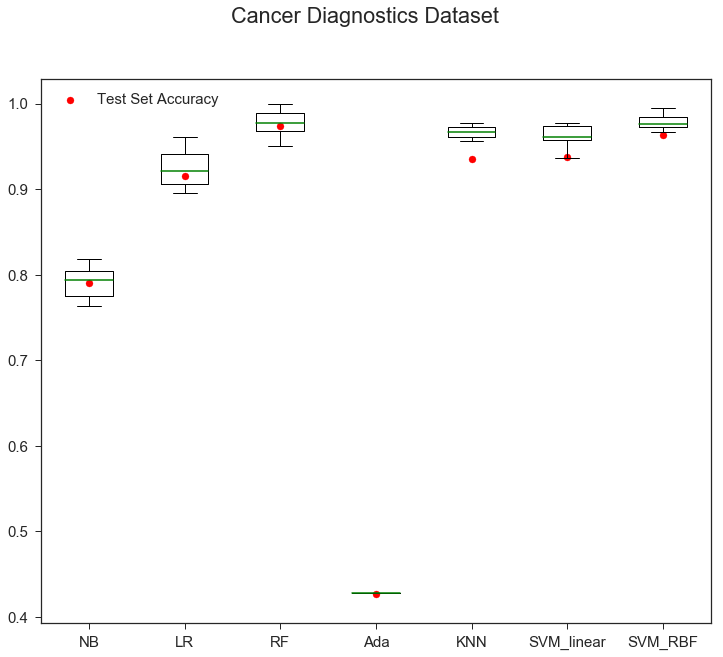

In [46]:
sns.set(font_scale=1.5)
sns.set_style('ticks')
median_prop = dict(color='g', linewidth = 1.5)
fig = plt.figure(figsize=(12,10))
fig.suptitle('Cancer Diagnostics Dataset')
ax = fig.add_subplot(111)
method_labels = ['NB','LR','RF','Ada','KNN','SVM_linear','SVM_RBF']
test_results = [test_score_NB, test_score_LR, test_score_RF, test_score_Ada, 
                test_score_KNN, test_score_SVM_L, test_score_SVM_RBF]
plt.boxplot([val_scores_NB, val_scores_LR, val_scores_RF, val_scores_Ada, 
             val_scores_KNN, val_scores_SVM_L_opt, val_scores_SVM_RBF], medianprops = median_prop)
ax.set_xticklabels(method_labels)
plt.scatter(x=range(1,8), y=test_results, color='r', label='Test Set Accuracy')
ax.legend()
plt.show()


In [47]:
test_results

[0.79004329004329,
 0.9155844155844156,
 0.974025974025974,
 0.4264069264069264,
 0.935064935064935,
 0.9372294372294372,
 0.9632034632034632]